In [11]:
import numpy as np
# Enter path to the SEVIR data location
DATA_PATH    = '../../sevir_data_copy/data'
CATALOG_PATH = '../../sevir_data_copy/CATALOG.csv' 

# On some Linux systems setting file locking to false is also necessary:
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE' 

In [12]:
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt

In [13]:
# !pip install --upgrade scikit-image

Requirement already up-to-date: scikit-image in /state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/site-packages (0.15.0)


In [50]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['vis','ir069','ir107','vil'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

# Grab a sample event and view catalog entries
sample_event = events.get_group( event_ids[-150])
print('Sample Event:',event_ids[-1])
sample_event

Found 12739 events matching {'ir107', 'vis', 'ir069', 'vil'}
Sample Event: S858968


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,...,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
17837,S851130,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0801_0831.h5,260,vis,2019-08-29 23:35:00,-121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...,140669.0,851130.0,Hail,41.705463,...,44.648444,-83.009711,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,-0.003313,0.891242,0.0
44888,S851130,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0701_1...,103,ir107,2019-08-29 23:35:00,-121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...,140669.0,851130.0,Hail,41.705463,...,44.648444,-83.009711,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-63.578945,24.328241,0.0
45803,S851130,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0701_1...,103,ir069,2019-08-29 23:35:00,-121:-116:-111:-106:-101:-96:-91:-86:-81:-76:-...,140669.0,851130.0,Hail,41.705463,...,44.648444,-83.009711,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-66.003700,-21.352020,0.0
49744,S851130,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0701_1231.h5,80,vil,2019-08-29 23:35:00,-120:-115:-110:-105:-100:-95:-90:-85:-80:-75:-...,140669.0,851130.0,Hail,41.705463,...,44.648444,-83.009711,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.0
73924,S851130,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0801_0901.h5,0,lght,2019-08-29 23:35:00,NaN,140669.0,851130.0,Hail,41.705463,...,44.648444,-83.009711,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,360338.000000,0.0


In [51]:
# !pip install ipympl --user

(<matplotlib.image.AxesImage at 0x7f93535cef60>, Text(0.5, 1.0, 'IR 6.9'))

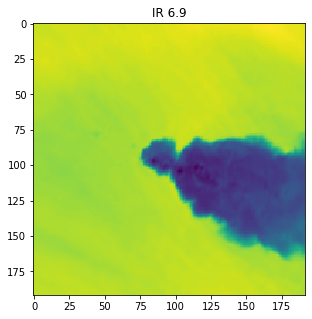

In [52]:
def read_data( sample_event, img_type, data_path=DATA_PATH ):
    """
    Reads single SEVIR event for a given image type.
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    img_type   str
        SEVIR image type
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array
       LxLx49 tensor containing event data
    """
    fn = sample_event[sample_event.img_type==img_type].squeeze().file_name
    fi = sample_event[sample_event.img_type==img_type].squeeze().file_index
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data=hf[img_type][fi] 
    return data

# ir069 = read_data(sample_event, 'ir069')

# # plot a frame from each img_type
# fig,axs = plt.subplots(1,1,figsize=(10,5))
# frame_idx = 30
# axs.imshow(ir069[:,:,frame_idx]), axs.set_title('IR 6.9')

/state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retai

CPU times: user 5.82 s, sys: 355 ms, total: 6.18 s
Wall time: 9.39 s


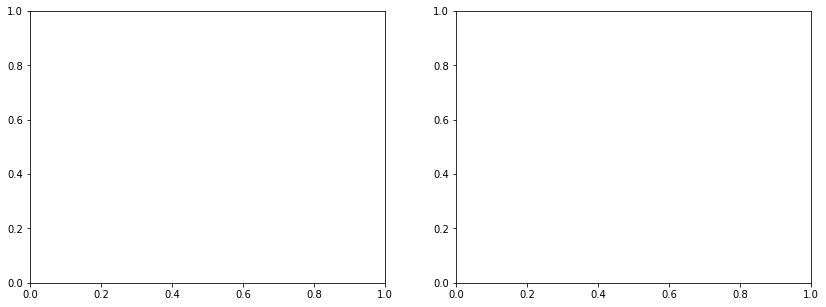

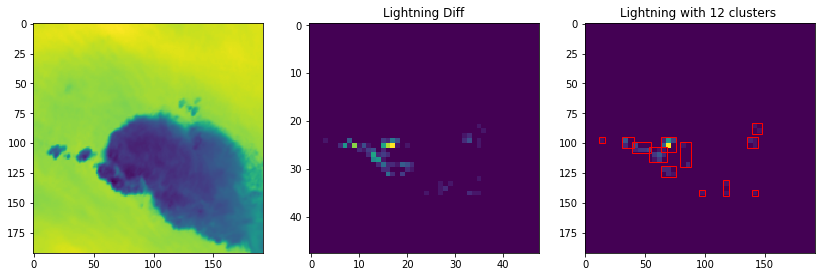

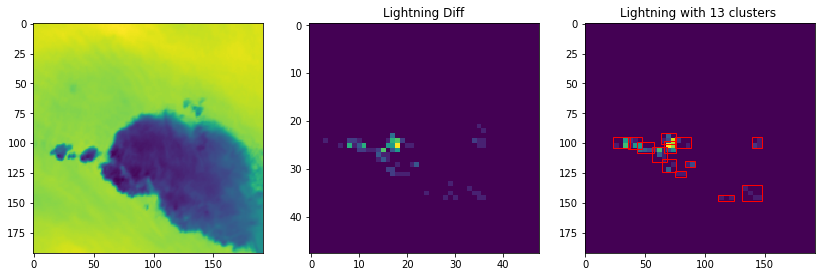

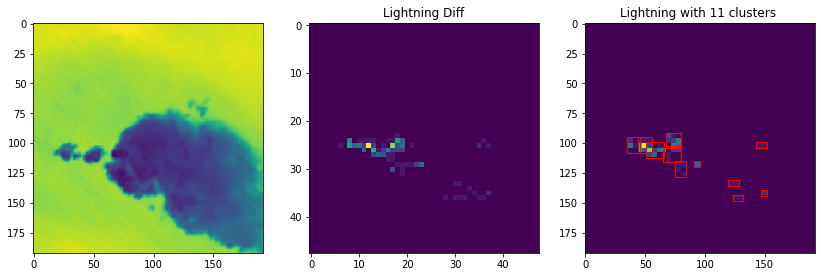

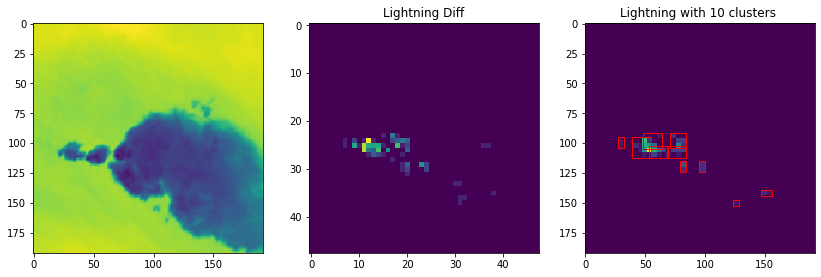

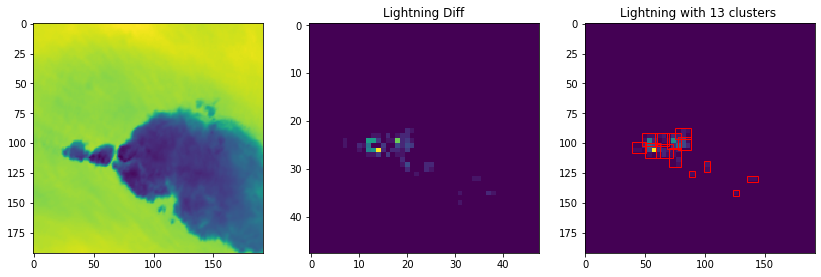

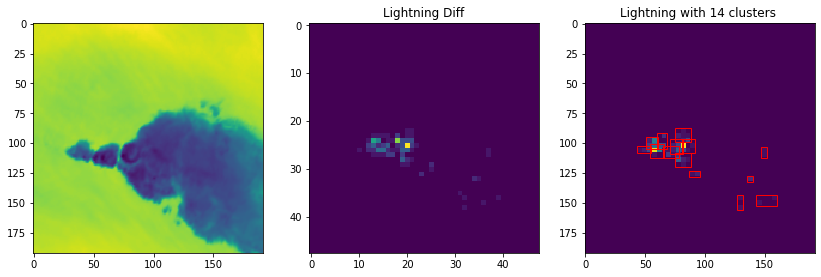

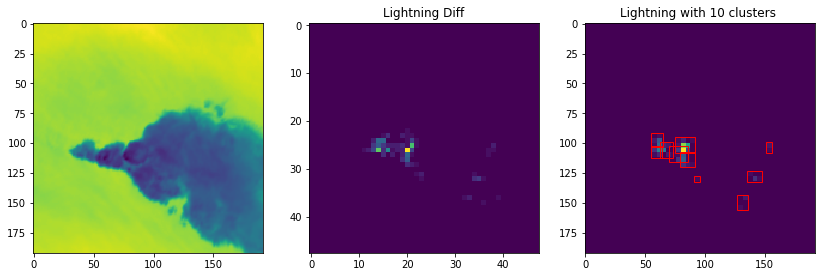

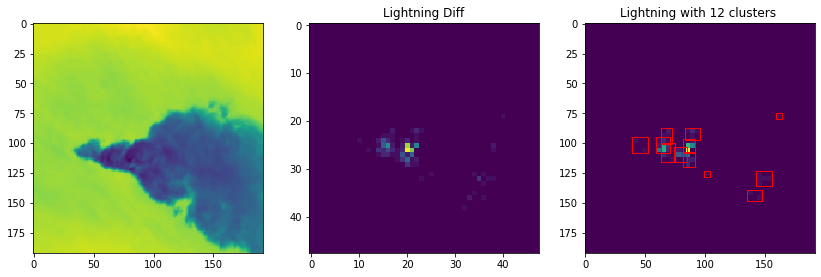

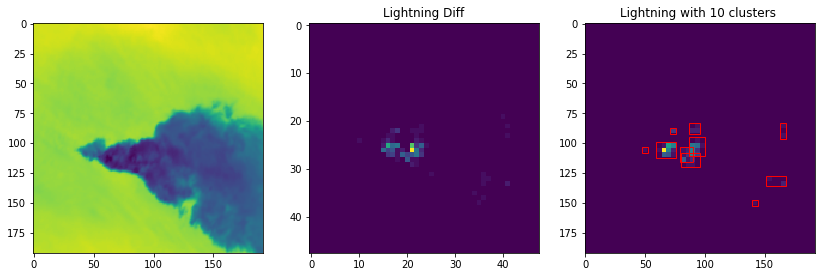

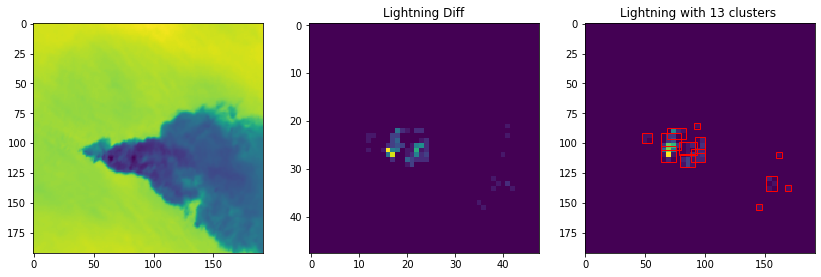

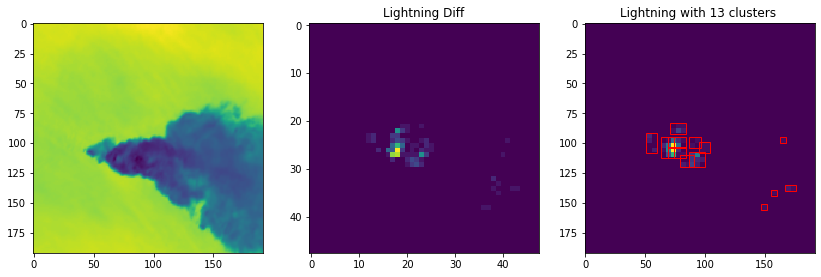

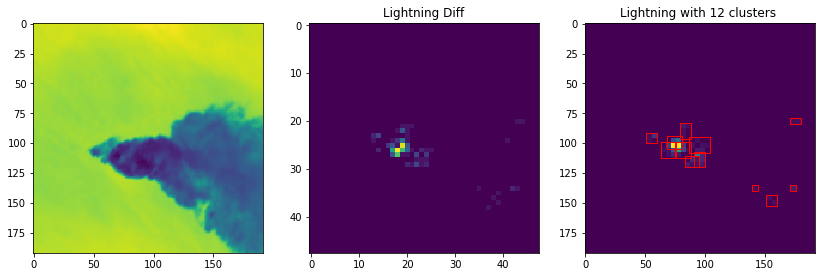

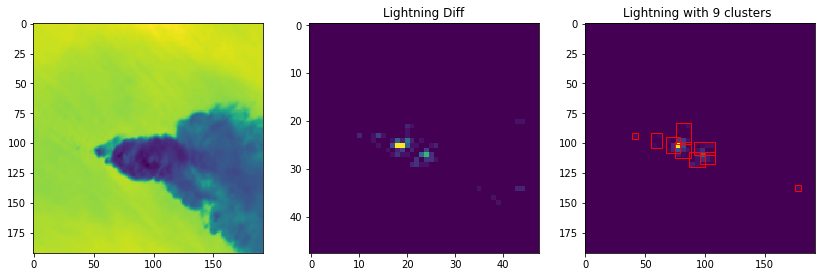

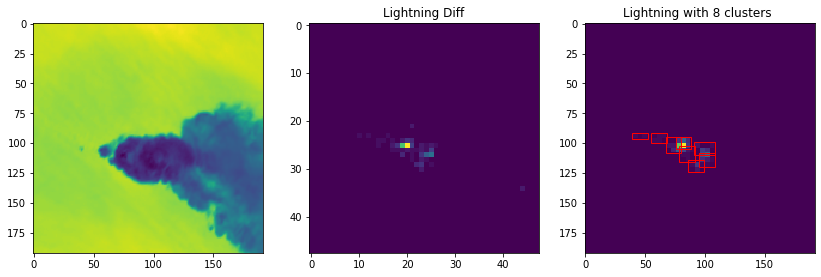

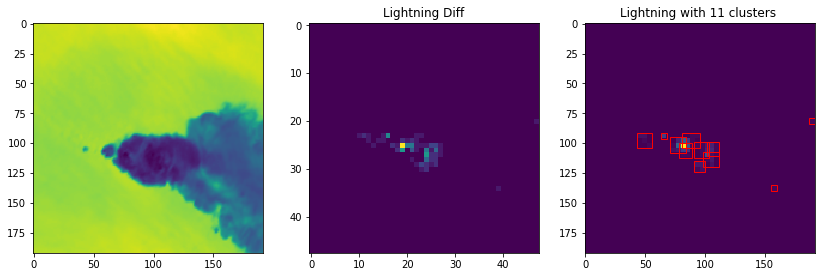

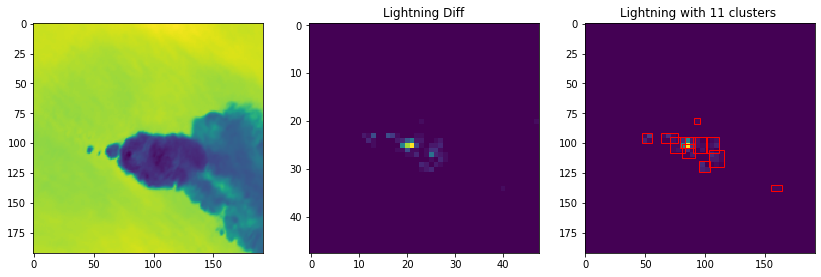

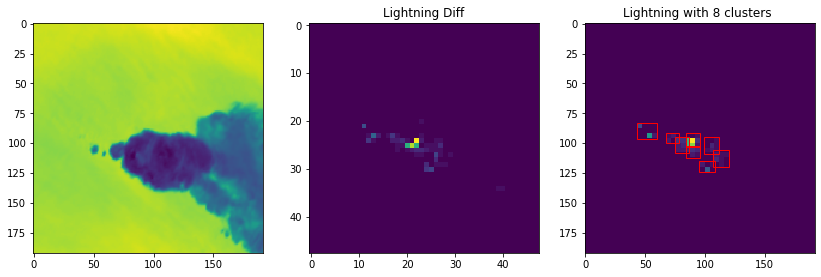

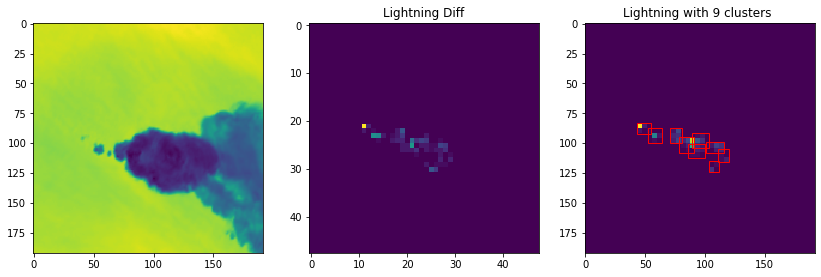

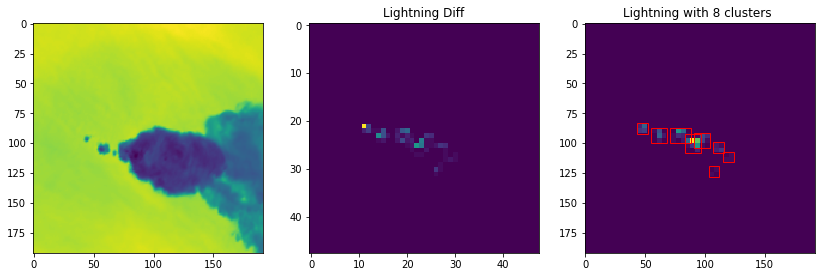

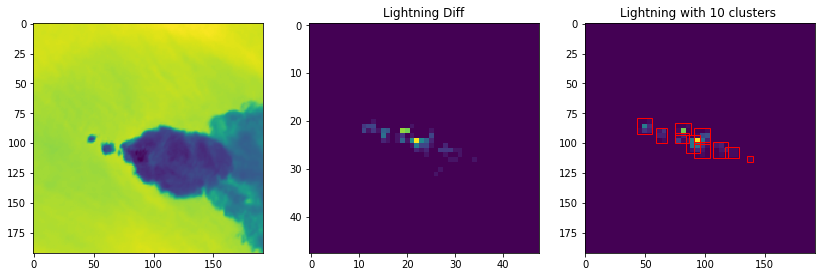

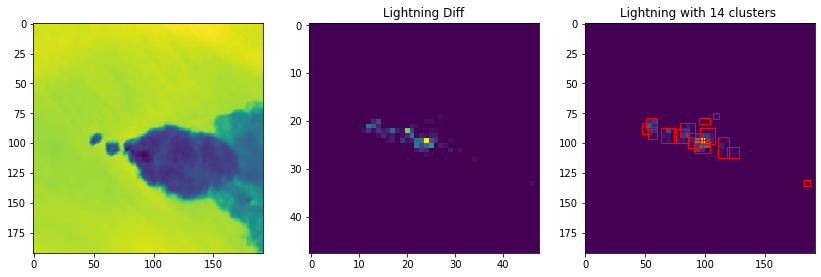

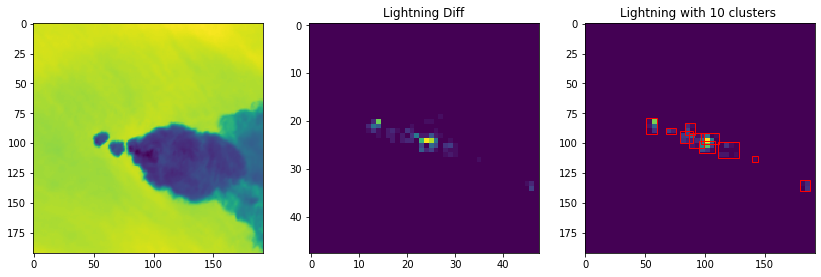

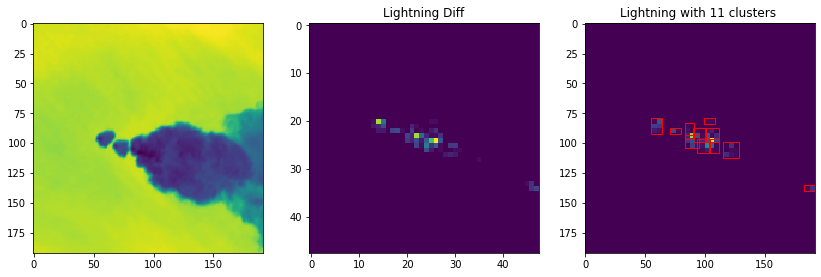

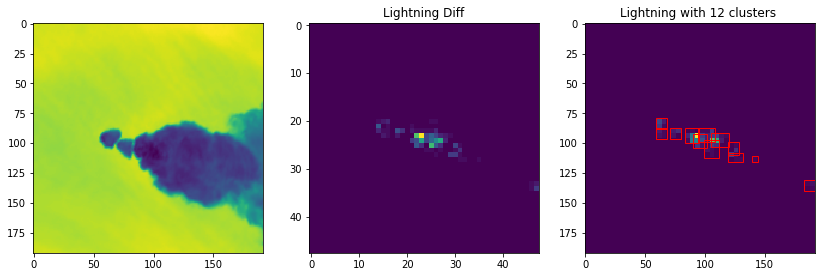

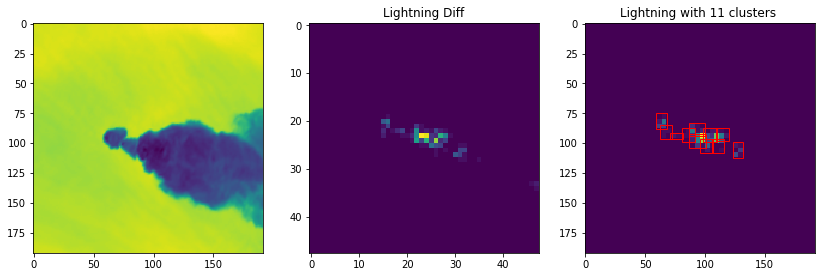

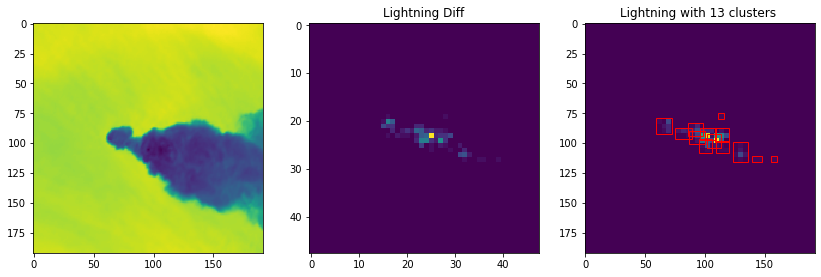

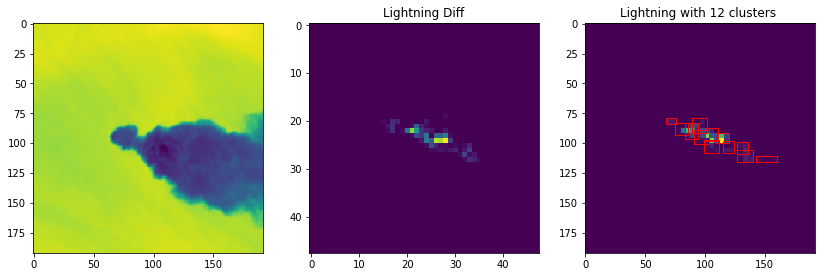

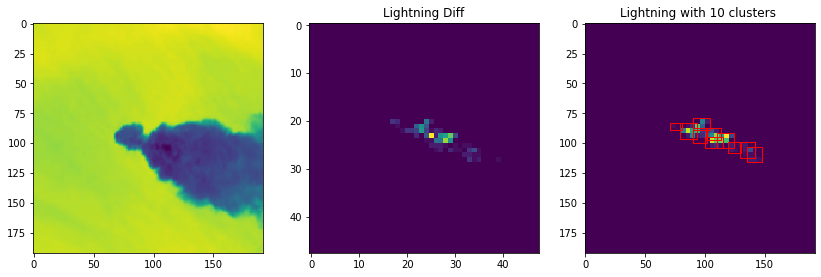

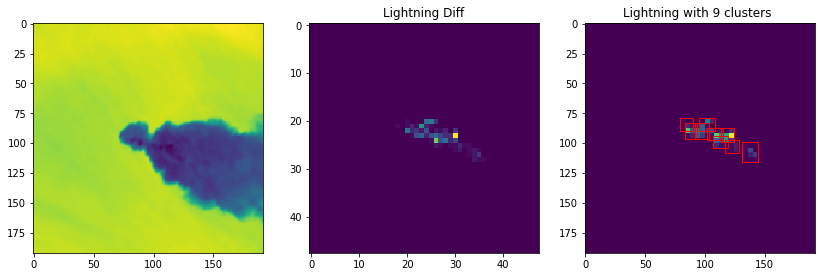

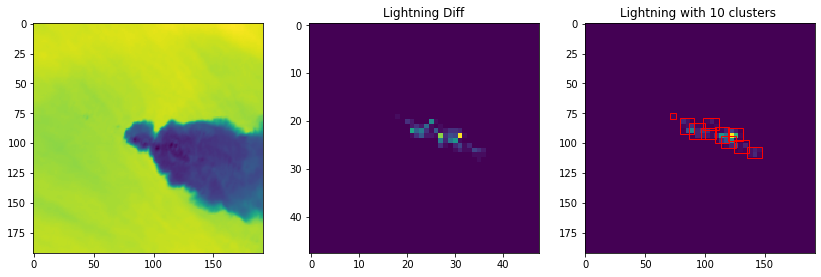

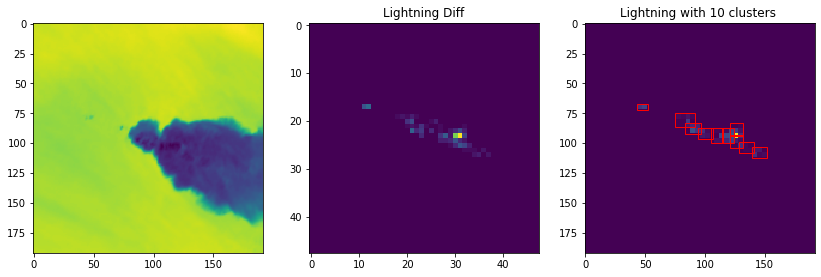

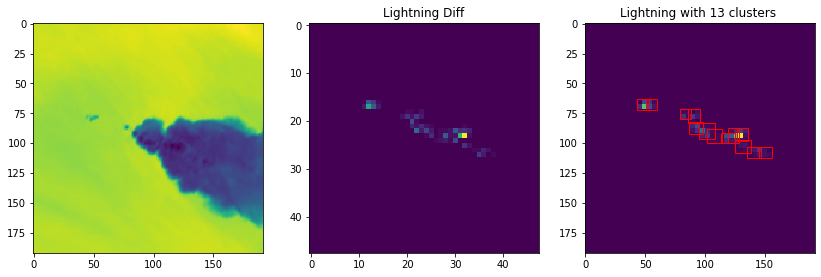

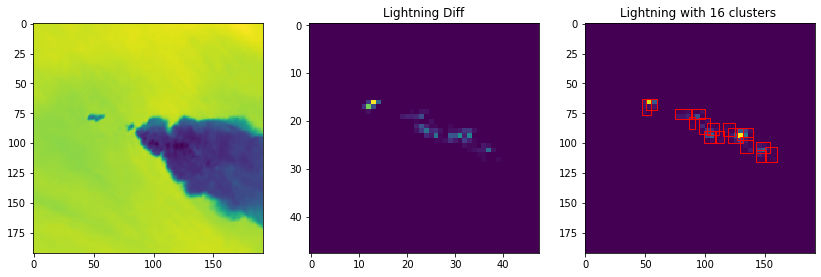

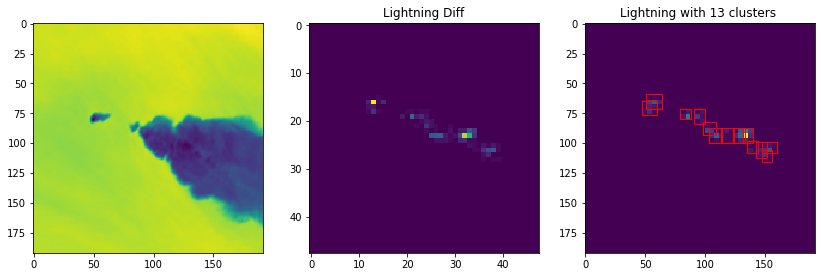

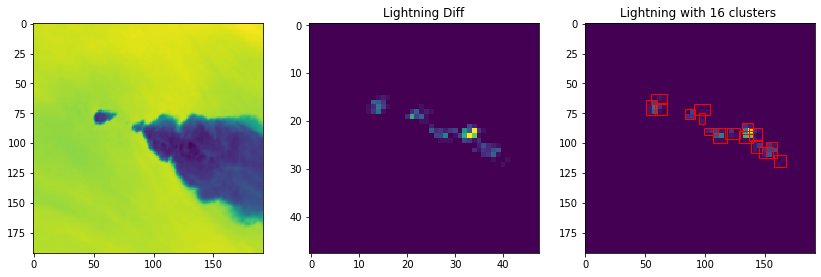

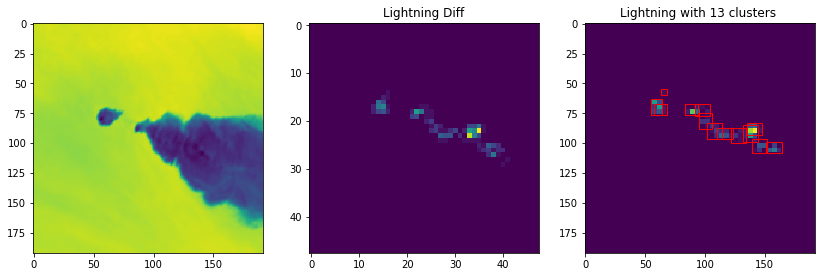

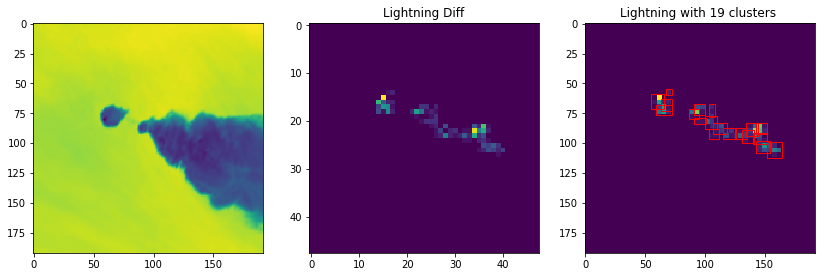

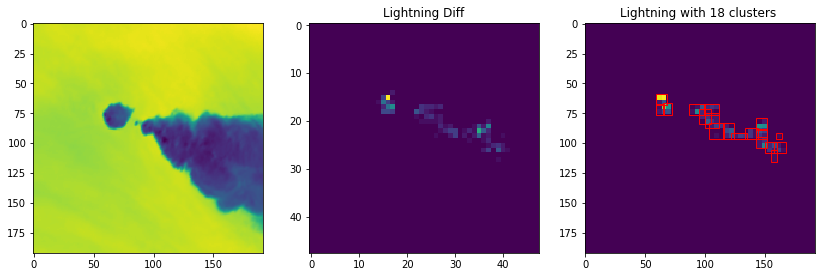

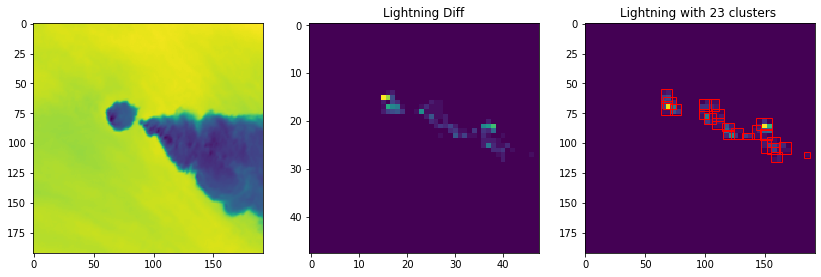

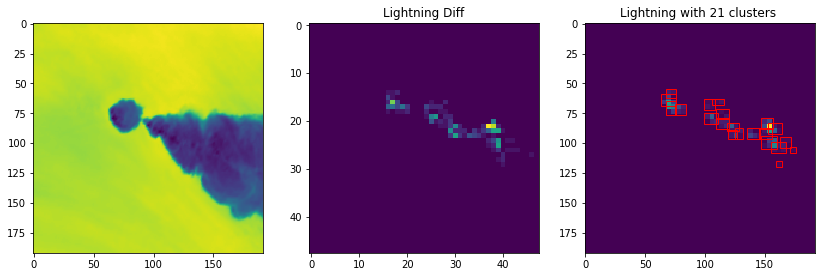

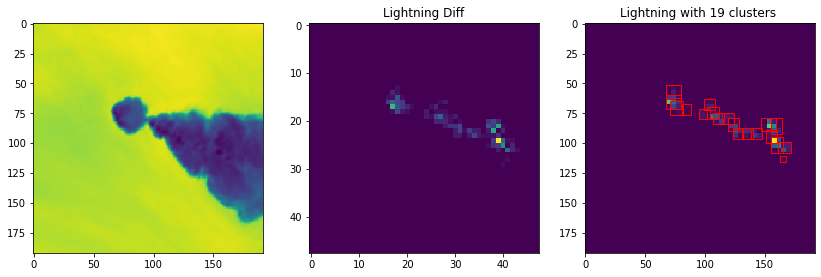

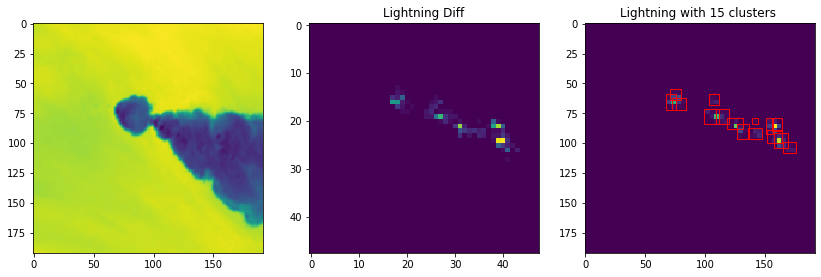

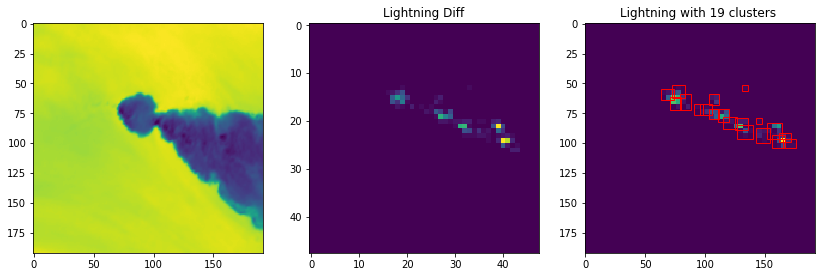

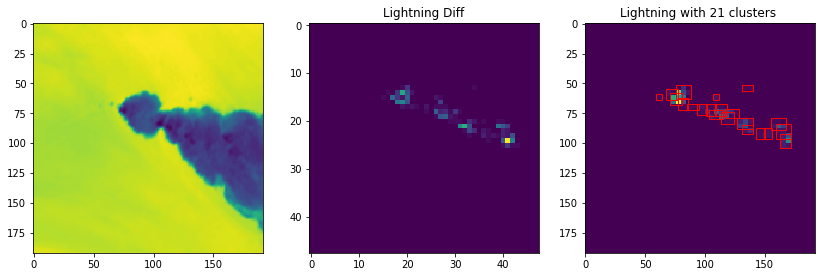

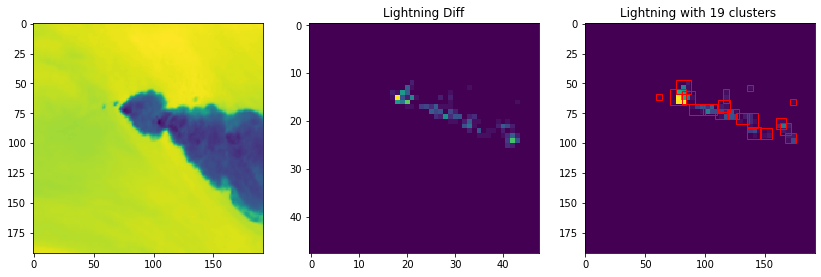

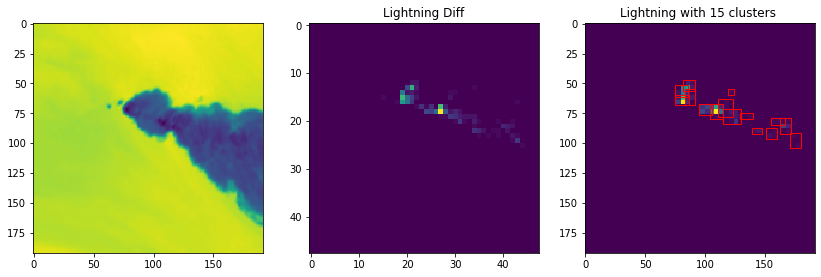

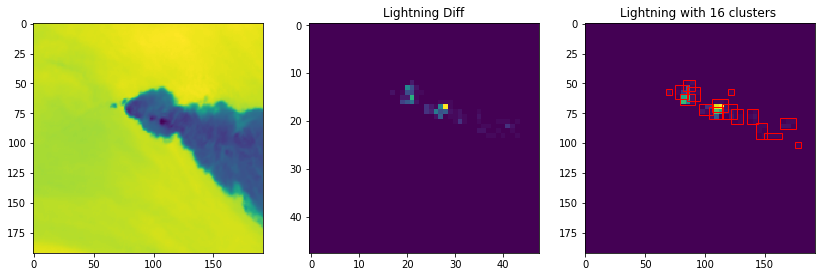

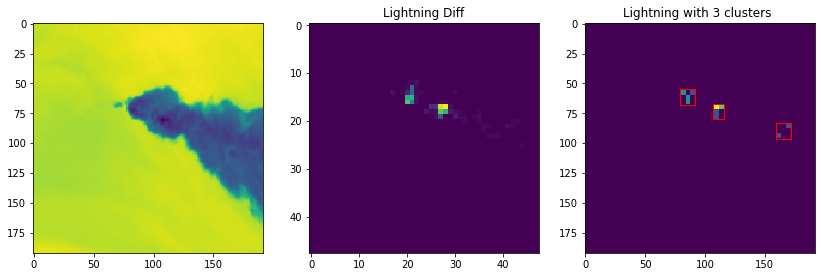

In [53]:
%%time
import matplotlib.patches as patches
from math import sqrt
import cv2
def lght_to_grid(data):
    """
    Converts SEVIR lightning data stored in Nx5 matrix to an LxLx49 tensor representing
    flash counts per pixel per frame
    
    Parameters
    ----------
    data  np.array
       SEVIR lightning event (Nx5 matrix)
       
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts
    """
    FRAME_TIMES = np.arange(-120.0,125.0,5) * 60 # in seconds
    out_size = (48,48,len(FRAME_TIMES))
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # filter out points outside the grid
    x,y=data[:,3],data[:,4]
    m=np.logical_and.reduce( [x>=0,x<out_size[0],y>=0,y<out_size[1]] )
    data=data[m,:]
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # Filter/separate times
    # compute z coodinate based on bin locaiton times
    t=data[:,0]
    z=np.digitize(t,FRAME_TIMES)-1
    z[z==-1]=0 # special case:  frame 0 uses lght from frame 1

    x=data[:,3].astype(np.int64)
    y=data[:,4].astype(np.int64)

    k=np.ravel_multi_index(np.array([y,x,z]),out_size)
    n = np.bincount(k,minlength=np.prod(out_size))
    return np.reshape(n,out_size).astype(np.float32)

def read_lght_data( sample_event, data_path=DATA_PATH ):
    """
    Reads lght data from SEVIR and maps flash counts onto a grid  
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts for selected event
    
    """
    fn = sample_event[sample_event.img_type=='lght'].squeeze().file_name
    id = sample_event[sample_event.img_type=='lght'].squeeze().id
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data      = hf[id][:] 
    return lght_to_grid(data)

lght = read_lght_data(sample_event)

def optimal_number_of_clusters(wcss):
    x1, y1 = wcss[0][1], wcss[0][0]
    x2, y2 = wcss[-1][1], wcss[-1][0]

    distances = []
    for i in range(len(wcss)):
        x0 = wcss[i][1]
        y0 = wcss[i][0]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

# include lightning counts in plot
fig,axs = plt.subplots(1,2,figsize=(14,5))
from sklearn.cluster import KMeans
for i in range(1,49):
    fig,axs = plt.subplots(1,3,figsize=(14,5))
    frame_idx = i
    lightning_img = cv2.resize(lght[:,:,frame_idx], (192,192), interpolation=cv2.INTER_NEAREST)
    axs[0].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
    axs[1].imshow(np.absolute(lght[:,:,frame_idx] - lght[:,:,frame_idx-1])), axs[1].set_title('Lightning Diff')
    axs[2].imshow(lightning_img)
    thresh_points = np.argwhere(lightning_img > np.percentile(lightning_img.flatten(), 1)/5)
    #print(optimal_number_of_clusters(thresh_points))
    optimal_kmeans = None
    optimal_points = 1
    for num_cluster_points in range(1,25):
        kmeans = KMeans(num_cluster_points, n_init=10,max_iter=300, n_jobs=8)
        kmeans.fit(thresh_points)
        optimal_kmeans = kmeans
        optimal_points = num_cluster_points
        if(kmeans.inertia_ <12000):
            break
    axs[2].set_title('Lightning with ' + str(optimal_points) +' clusters ')
    #print(len(thresh_points))
    min_max_dict = {}
    for point, label in zip(thresh_points, optimal_kmeans.labels_):
        if(label not in min_max_dict.keys()):
            min_max_dict[label] = {}
            min_max_dict[label]["min_x"] = point[1]
            min_max_dict[label]["max_x"] = point[1]
            min_max_dict[label]["min_y"] = point[0]
            min_max_dict[label]["max_y"] = point[0]
        else:
            if(point[1] < min_max_dict[label]["min_x"]):
                min_max_dict[label]["min_x"] = point[1]
            if(point[0] < min_max_dict[label]["min_y"]):
                min_max_dict[label]["min_y"] = point[0]
            if(point[1] > min_max_dict[label]["max_x"]):
                min_max_dict[label]["max_x"] = point[1]
            if(point[0] > min_max_dict[label]["max_y"]):
                min_max_dict[label]["max_y"] = point[0]
    for label in range(num_cluster_points):
        start_x, start_y = min_max_dict[label]["min_x"], min_max_dict[label]["min_y"]
        length_x, length_y = min_max_dict[label]["max_x"] - start_x, min_max_dict[label]["max_y"] - start_y
        #print((start_x, start_y, length_x, length_y))
        rect = patches.Rectangle((start_x-1, start_y-1),length_x+2,length_y+2,linewidth=1, edgecolor='r',facecolor='none')
        axs[2].add_patch(rect)
    #axs[3].plot(sum_of_squares)
# DIFFERENCES IN LIGHTNING